In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 0

In [21]:
supacoolsoft_path= "../data/supahcoolsoft.csv"

df= pd.read_csv(supacoolsoft_path)
df

,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
0,E001,Ann,Larsson,41,Product Management,AI Specialist,60777.0,ann.larsson@supacoolsoft.se,+46 (0)25 37 22 30
1,E002,Emma,Kim,52,Engineering,Database Administrator,46020.0,emma.kim@supacoolsoft.se,+46 (0)855 449 66
2,E003,Barbro,Andersson,59,DevOps,Data Scientist,48503.0,barbro.andersson@supacoolsoft.se,+46 (0)47 61 73 44
3,E004,Magnus,Söderström,52,Product Management,Junior Data Scientist,47296.0,magnus.söderström@supacoolsoft.se,+46 (0)258 579 26
4,E005,Therese,Ljungberg,46,Product Management,Junior Data Scientist,42435.0,therese.ljungberg@supacoolsoft.se,+46 (0)575 495 24
...,...,...,...,...,...,...,...,...,...
95,E096,Erik,Höglund,55,Data Science,Junior Data Engineer,42590.0,erik.höglund@supacoolsoft.se,+46 (0)8 454 503 87
96,E097,Fatima,Khan,26,Engineering,BI Developer,42809.0,fatima.khan@supacoolsoft.se,08-677 430 60
97,E098,Gunnel,Olofsson,27,Engineering,Senior Data Engineer,62630.0,gunnel.olofsson@supacoolsoft.se,+46 (0)35 20 46 36
98,E099,Wei,Zhang,43,Product Management,Senior Data Analyst,52075.0,wei.zhang@supacoolsoft.se,+46 (0)490 722 64


In [22]:
nones= df.isna().sum()
nones

EmployeeID     0
FirstName      0
LastName       0
Age            0
Department     2
Position       1
Salary_SEK     1
Email          0
PhoneNumber    0
dtype: int64

In [23]:
null_columns=df.columns[df.isna().any()]
null_columns

Index(['Department', 'Position', 'Salary_SEK'], dtype='object')

In [24]:
mean_salary= np.round(np.mean(df["Salary_SEK"]))
df["Salary_SEK"].fillna(mean_salary, inplace=True)

C:\Users\milto\AppData\Local\Temp\ipykernel_1040\3031553461.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Salary_SEK"].fillna(mean_salary, inplace=True)


In [25]:
departments= set(df["Department"])

for role in departments:
    department_salary= df[df["Department"]== role]["Salary_SEK"]
    departments_mean_salary= np.round(np.mean(department_salary))
    median_salary= department_salary.median()
    print(f"{role} average salary: {departments_mean_salary}, median salary: {median_salary}")

DevOps average salary: 51093.0, median salary: 48816.0
Data Science average salary: 50979.0, median salary: 47256.5
Product Management average salary: 54872.0, median salary: 53772.0
IT average salary: 53585.0, median salary: 53193.0
Engineering average salary: 48425.0, median salary: 48507.5
nan average salary: nan, median salary: nan


In [26]:
engineers= df[df["Department"]== "Engineering"]
engineers_ages= engineers.groupby("Age")["Salary_SEK"].mean().round().reset_index()
engineers_ages.columns= ["Age", "Salary"]

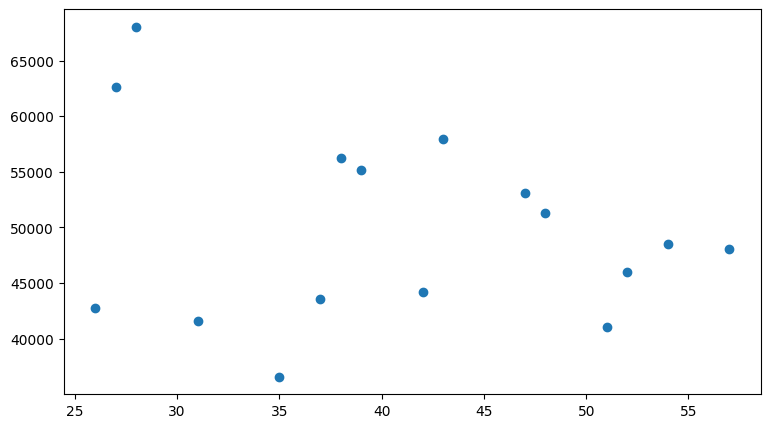

In [27]:
fig, ax= plt.subplots(figsize= (9,5))

ax.scatter(engineers_ages["Age"], engineers_ages["Salary"])

## Exercise 1

In [28]:
tables= pd.read_html("https://en.wikipedia.org/wiki/2024_Summer_Olympics")

In [29]:
medal= tables[12]
medal

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,United States‡,40,44,42,126
1,2,China,40,27,24,91
2,3,Japan,20,12,13,45
3,4,Australia,18,19,16,53
4,5,France*,16,26,22,64
5,6,Netherlands,15,7,12,34
6,7,Great Britain,14,22,29,65
7,8,South Korea,13,9,10,32
8,9,Italy,12,13,15,40
9,10,Germany,12,13,8,33


In [30]:
medal.sort_values(by= "Total", ascending=False, inplace=True)

In [31]:
medal= medal[2:]
medal

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,United States‡,40,44,42,126
1,2,China,40,27,24,91
6,7,Great Britain,14,22,29,65
4,5,France*,16,26,22,64
3,4,Australia,18,19,16,53
2,3,Japan,20,12,13,45
8,9,Italy,12,13,15,40
5,6,Netherlands,15,7,12,34
9,10,Germany,12,13,8,33
7,8,South Korea,13,9,10,32


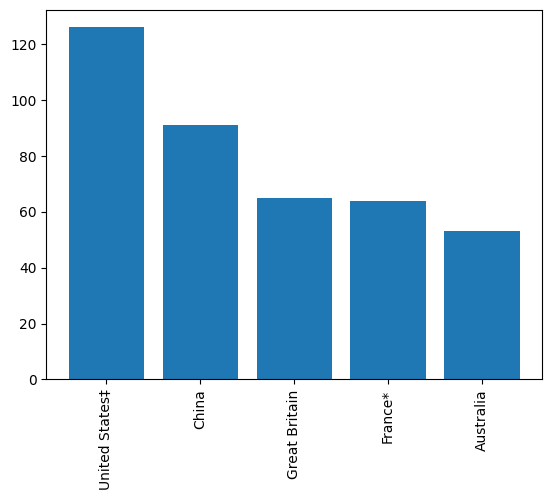

In [32]:
plt.bar(medal["NOC"].head(5), medal["Total"].head(5))
plt.xticks(rotation=90);

In [33]:
medal_by_gold= medal.sort_values(by= "Gold", ascending=False)

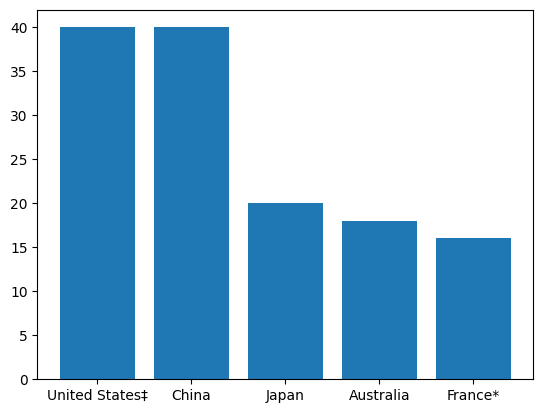

In [34]:
plt.bar(medal_by_gold["NOC"].head(5), medal_by_gold["Gold"].head(5));

In [60]:
grand_paris_zone= len(set(tables[3]["Venue"]))
paris_center_zone= len(set(tables[4]["Venue"]))
versailles_zone= len(set(tables[5]["Venue"]))
outlying_venues= len(set(tables[6]["Venue"]))
non_comp_venues= len(set(tables[7]["Venue"]))
venues_total= grand_paris_zone+paris_center_zone+versailles_zone+outlying_venues+non_comp_venues
venues_total

43

In [61]:
venues_total-non_comp_venues

34

In [67]:

for i in range(3,7):
    venues_= tables[i]["Venue"].unique()
len(venues_)

11